### Performing hyperparameter tuning 

In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
df = sns.load_dataset('titanic') 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
df.drop(['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive'], axis=1, inplace=True)
df.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [21]:
# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [34]:
df.dropna(subset=['fare'], inplace=True)

In [23]:
# Fill embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [24]:
# Encode 'sex': male → 0, female → 1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [25]:
# One-hot encode 'embarked'
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [26]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [27]:
df['is_alone'] = (df['family_size'] == 1).astype(int)

In [28]:
survival_counts = df['survived'].value_counts()
print(survival_counts)

survived
0    549
1    342
Name: count, dtype: int64


C:\Users\bisss\AppData\Local\Temp\ipykernel_10344\2258999463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='pastel')


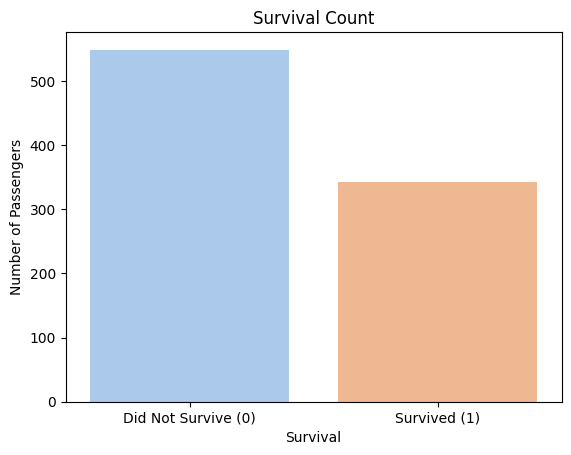

In [29]:
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive (0)', 'Survived (1)'])
plt.ylabel('Number of Passengers')
plt.xlabel('Survival')
plt.show()

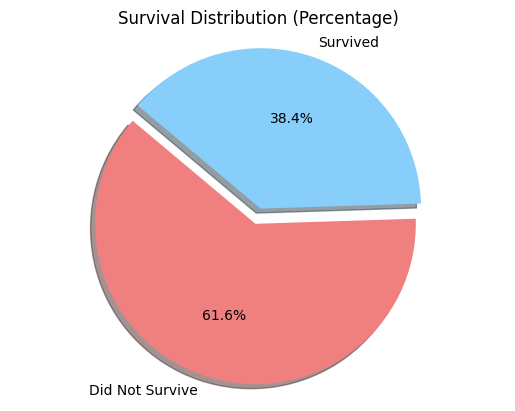

In [31]:
labels = ['Did Not Survive', 'Survived']
colors = ['lightcoral', 'lightskyblue']
explode = (0.05, 0.05)

survival_percent = df['survived'].value_counts(normalize=True) * 100

plt.pie(survival_percent, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival Distribution (Percentage)')
plt.axis('equal')  # Makes the pie chart round
plt.show()

In [35]:
# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Decision Tree Pipeline
pipe_dt = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

In [43]:
# Random Forest Pipeline
pipe_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

In [44]:
# SVM Pipeline
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

In [45]:
from sklearn.model_selection import GridSearchCV

# Define grid for Decision Tree
param_grid_dt = {
    'clf__max_depth': [3, 5, 7, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}

# Grid Search
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Results
print("Best DT Parameters:", grid_dt.best_params_)
print("Best DT CV Score:", grid_dt.best_score_)

Best DT Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_split': 2}
Best DT CV Score: 0.8230079779375554


In [46]:
# Define grid for Random Forest
param_grid_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 5],
    'clf__criterion': ['gini', 'entropy']
}

# Grid Search
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Results
print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF CV Score:", grid_rf.best_score_)


Best RF Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best RF CV Score: 0.8300206835418102


In [47]:
# Define grid for SVM
param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 0.01, 0.1],
    'clf__kernel': ['rbf', 'linear']
}

# Grid Search
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Results
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM CV Score:", grid_svm.best_score_)


Best SVM Parameters: {'clf__C': 1, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Best SVM CV Score: 0.8300108342361863


In [52]:
# Predictions
y_pred_dt = grid_dt.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_svm = grid_svm.predict(X_test)


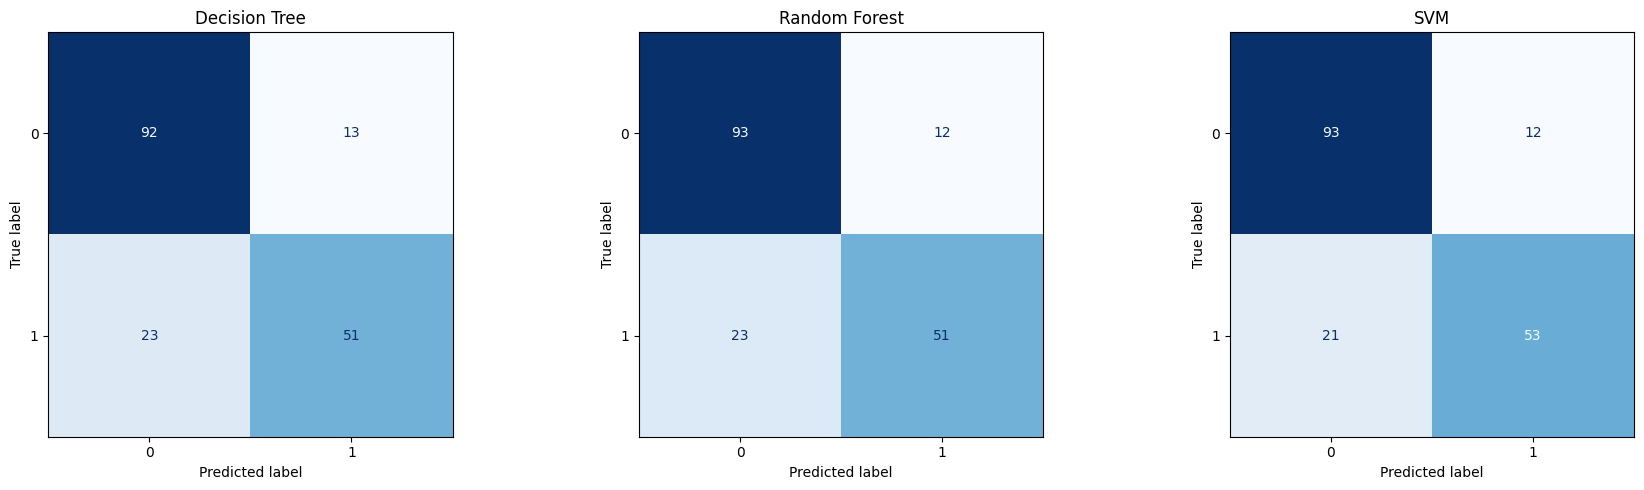

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ['Decision Tree', 'Random Forest', 'SVM']
predictions = [y_pred_dt, y_pred_rf, y_pred_svm]

for ax, title, y_pred in zip(axes, titles, predictions):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [1]:
import joblib
import pickle

In [57]:
# Decision Tree
joblib.dump(grid_dt.best_estimator_, '../models/decision_tree_model.joblib')
pickle.dump(grid_dt.best_estimator_, open('../models/decision_tree_model.pkl', 'wb'))

# Random Forest
joblib.dump(grid_rf.best_estimator_, '../models/random_forest_model.joblib')
pickle.dump(grid_rf.best_estimator_, open('../models/random_forest_model.pkl', 'wb'))

# SVM
joblib.dump(grid_svm.best_estimator_, '../models/svm_model.joblib')
pickle.dump(grid_svm.best_estimator_, open('../models/svm_model.pkl', 'wb'))
